In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from build_portfolio import build_portfolio

<b> Данные </b>
    
Я использовал данные дневных цен закрытия для примерно 400 компаний на рынке USA.<br>
По условию задания я должен был использовать данные market capitalization, 
но не смог найти их в открытом доступе. <br>
Вместо этого я использовал ликвидность


In [2]:
data_price_path = 'adjclose_top400.csv'
data_cap_path = 'liq_top400.csv'
df_price = pd.read_csv(data_price_path)
df_cap = pd.read_csv(data_cap_path)

In [3]:
df_price.head()

,Date,A,AAL,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XLNX,XOM,XRAY,XRX,XYL,ZBRA,ZION,ZTS
0,2010-05-03,24.069094,6.966859,33.028946,NaN,26.876324,9.87,17.595314,35.532982,33.590000,...,60.281830,15.377854,20.955778,48.723606,34.534702,25.062410,NaN,28.66,26.295507,NaN
1,2010-05-04,23.146126,6.467206,32.077824,NaN,26.609961,9.28,17.360115,34.923851,33.139999,...,57.519680,15.127350,20.263884,47.739655,33.828777,24.041769,NaN,29.01,25.180216,NaN
2,2010-05-05,22.753380,6.533199,31.744251,NaN,26.661516,9.02,17.346281,34.249725,32.959999,...,56.141907,15.127350,20.136633,47.524181,33.555813,23.633514,NaN,28.93,25.261831,NaN
3,2010-05-06,21.784586,6.024120,30.536434,NaN,26.420937,8.93,16.948509,33.372574,32.490002,...,52.848301,14.688979,19.659460,45.886654,32.661606,22.771645,NaN,27.82,23.982862,NaN
4,2010-05-07,20.861626,6.014690,29.248018,NaN,25.699190,8.61,16.851662,32.747192,32.419998,...,50.506054,14.521976,19.436783,45.750187,31.823902,22.068533,NaN,26.99,23.193718,NaN


In [4]:
df_cap.head()

,Date,A,AAL,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XLNX,XOM,XRAY,XRX,XYL,ZBRA,ZION,ZTS
0,2010-02-01,1.730816e+09,1.471432e+09,9.822832e+10,NaN,1.735086e+09,41016339.0,5.154257e+09,2.961929e+09,4.190885e+09,...,2.459538e+09,8.594840e+08,3.112541e+09,3.083821e+10,6.710997e+08,2.503334e+09,NaN,1.074386e+08,3.600959e+09,NaN
1,2010-03-01,2.497756e+09,1.922470e+09,8.145473e+10,NaN,1.997452e+09,78741016.0,6.138699e+09,2.622546e+09,6.622614e+09,...,2.272304e+09,8.598782e+08,3.258346e+09,2.792540e+10,9.720449e+08,2.836107e+09,NaN,1.753977e+08,1.982230e+09,NaN
2,2010-04-01,2.399472e+09,9.423820e+08,8.243466e+10,NaN,1.494479e+09,42455000.0,6.874286e+09,2.668013e+09,4.955930e+09,...,2.914996e+09,6.288059e+08,2.811626e+09,2.604871e+10,6.600959e+08,2.236586e+09,NaN,1.451695e+08,2.879223e+09,NaN
3,2010-05-03,2.545882e+09,2.315490e+09,1.008896e+11,NaN,2.075433e+09,50855175.0,6.461781e+09,3.117735e+09,5.333296e+09,...,4.391121e+09,7.900065e+08,2.745159e+09,2.642796e+10,7.996821e+08,3.986552e+09,NaN,1.230202e+08,4.221886e+09,NaN
4,2010-06-01,2.649653e+09,2.215549e+09,1.533056e+11,NaN,2.508582e+09,53211604.0,7.380489e+09,3.683005e+09,5.845225e+09,...,4.057541e+09,1.000045e+09,3.656424e+09,3.434227e+10,1.081470e+09,3.433076e+09,NaN,1.944968e+08,3.322169e+09,NaN


<b> Результаты </b>

Расчет перформанса портфеля с помощью функции build_portfolio <br>
- В первый доступный день происходит формирование портфеля из акций ТОП10 компаний по капитализации. Веса для каждой компании одинаковы. <br>
- Далее веса в портфеле перераспределяются 1 раз в месяц, в первый доступный день каждого месяца. В качестве веса используются значения доходности акции за последнии 20 дней. Если доходность была отрицательна, акция покупается в short. <br>
- В симмуляции использовался фиксированный booksize = 1. <br>
- Реинвестирование прибыли(убытков) полученых на начало месяца не происходит. <br>

In [5]:
help(build_portfolio)

Help on function build_portfolio in module build_portfolio:

build_portfolio(df_price: pandas.core.frame.DataFrame, df_cap: pandas.core.frame.DataFrame) -> pandas.core.series.Series
    :param df_price: pandas dataframe with close price data
    :param df_cap: pandas dataframe with market cap data
    :return: pandas series with portfolio performace



In [6]:
answer = build_portfolio(df_price, df_cap)

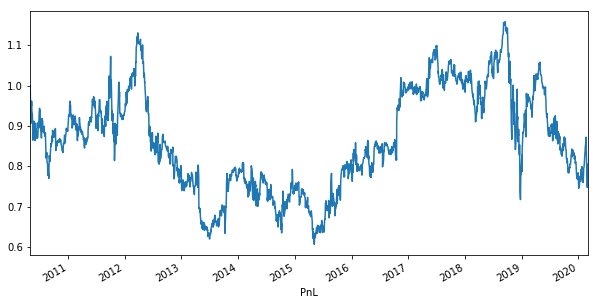

In [7]:
ax = answer.plot(figsize=(10,5))
ax.set_xlabel("PnL")
plt.show()